In [1]:
import sys
import librosa
import pathlib
import IPython.display as ipd

In [2]:
BASE_DIR = pathlib.Path().resolve().parent
sys.path.append(str(BASE_DIR))
sys.path.append(str(BASE_DIR) + "/" + "common")
sys.path.append(str(BASE_DIR) + "/" + "model_gan")

In [3]:
from config.config import get_settings
from common.data_tools import numpy_audio_to_matrix_spectrogram
from common.data_display import make_3plots_spec_voice_noise, make_3plots_timeseries_voice_noise
from common.test_model import prediction
from common.properties import (
    SignalAnalysis
)
settings = get_settings()


In [4]:
VALIDATION_DIR = BASE_DIR / "test_data" / "validation"
TEST_DIR = settings.AUDIO_DIR_PREDICTION
SAVED_PREDICTIONS_DIR = settings.DIR_SAVE_PREDICTION_GAN

list_files = ['noisy_voice_bells28.wav','voice_pred_bells28.wav','voice_bells28.wav']

sample_rate = settings.SAMPLE_RATE

min_duration = 1.0

frame_length = 8064

hop_length_frame = 8064

n_fft = 255

hop_length_fft = 63

dim_square_spec = int(n_fft / 2) + 1

# Bells example

### Noisy voice

In [5]:
noisy_voice_bells, sr = librosa.load(str(VALIDATION_DIR / list_files[0]), sr=sample_rate)
ipd.Audio(noisy_voice_bells, rate=8000)

### Predicted clean voice

In [6]:
voice_pred_bells, sr = librosa.load(str(VALIDATION_DIR / list_files[1]), sr=sample_rate)
ipd.Audio(voice_pred_bells, rate=8000)

### True clean voice

In [7]:
voice_bells, sr = librosa.load(str(VALIDATION_DIR / list_files[2]), sr=sample_rate)
ipd.Audio(voice_bells, rate=8000)

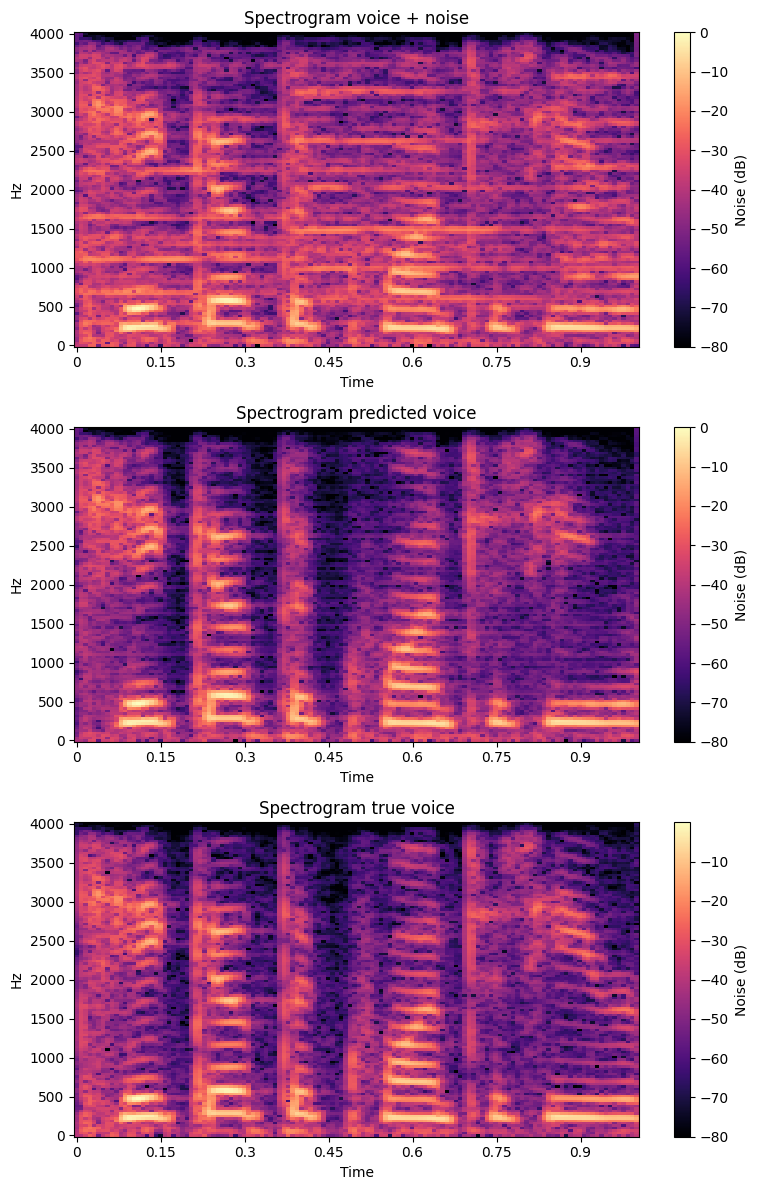

In [8]:
m_amp_db_noisy_voice,  m_pha_noisy_voice =  numpy_audio_to_matrix_spectrogram (noisy_voice_bells.reshape(1,8064), dim_square_spec, n_fft, hop_length_fft)

m_amp_db_voice_pred,  m_pha_voice_pred =  numpy_audio_to_matrix_spectrogram (voice_pred_bells.reshape(1,8064), dim_square_spec, n_fft, hop_length_fft)

m_amp_db_voice_true,  m_pha_voice_true =  numpy_audio_to_matrix_spectrogram (voice_bells.reshape(1,8064), dim_square_spec, n_fft, hop_length_fft)

make_3plots_spec_voice_noise(m_amp_db_noisy_voice[0,:,:],m_amp_db_voice_pred[0,:,:],m_amp_db_voice_true[0,:,:],sample_rate, hop_length_fft)


In [9]:
m_amp_db_voice_true.shape

(1, 128, 128)

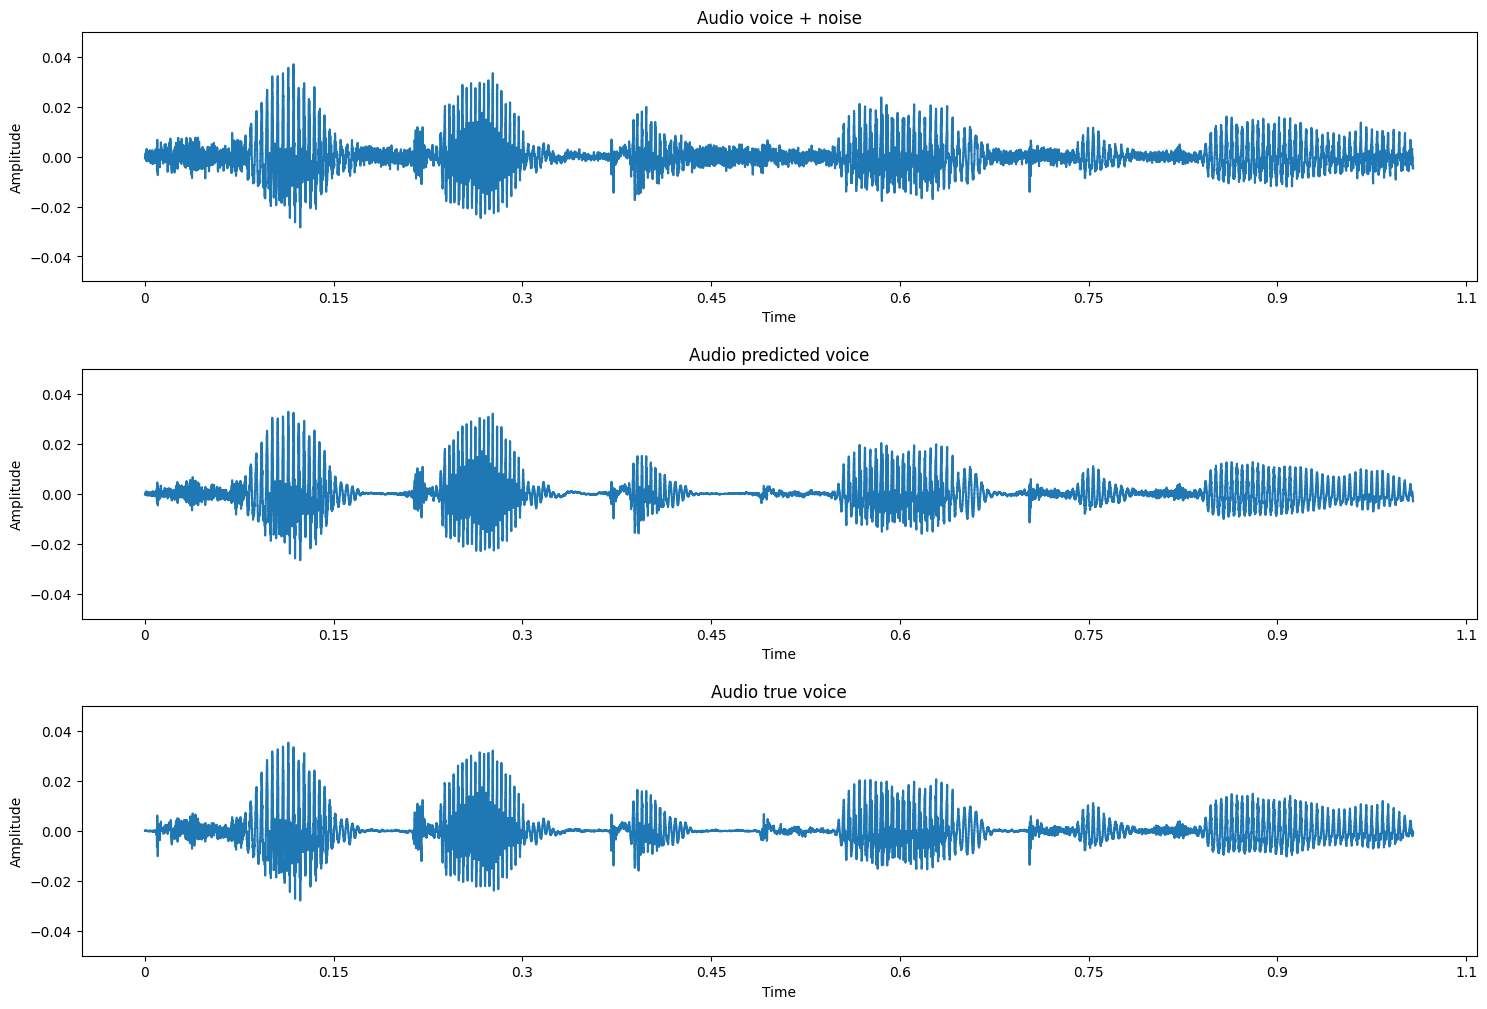

In [10]:
make_3plots_timeseries_voice_noise(noisy_voice_bells,voice_pred_bells,voice_bells, sample_rate)

# Blind test  examples

## Example 1

### Noisy voice

In [11]:
file_name = "noisy_voice_long_t1.wav"

noisy_voice_ex1, sr = librosa.load(str(TEST_DIR) + "/" + file_name, sr=sample_rate)
ipd.Audio(noisy_voice_ex1, rate=8000)

### Predicted denoise

In [12]:
print(settings.MODEL_FILE_GAN)
print(settings.MODEL_FILE_GAN.exists())

/workspaces/speech-enhancement-python/src/weights/model_gan.h5
True


In [13]:
prediction(
    model_file=str(settings.MODEL_FILE_GAN),
    json_file=str(settings.MODEL_JSON_GAN),
    dir_save_prediction=str(settings.DIR_SAVE_PREDICTION_GAN)
)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


2024-03-31 12:33:45.675093: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2024-03-31 12:33:45.679554: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2445430000 Hz
2024-03-31 12:33:45.679918: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x8628130 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2024-03-31 12:33:45.679950: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


Model loaded from disk <tensorflow.python.keras.engine.training.Model object at 0x7f26f8504110>
Denoising audio noisy_voice_long_t2.wav
Denoising audio noisecut1.wav
Denoising audio noisecut2.wav
Denoising audio noisecut11.wav
Denoising audio noisy_voice_long_t1.wav


In [14]:
voice_ex1, sr = librosa.load(str(settings.DIR_SAVE_PREDICTION_GAN / "noisy_voice_long_t1.wav"), sr=sample_rate)

ipd.Audio(voice_ex1, rate=8000)

In [15]:
signal_analysis = SignalAnalysis(
    clean_signal=voice_ex1,
    noise_signal=noisy_voice_ex1,
)

In [21]:
snr = signal_analysis.signal_to_noise_ratio()
snr

1.572

In [22]:
percent_noise_removed = signal_analysis.percent_noise_removed()
percent_noise_removed

82.365

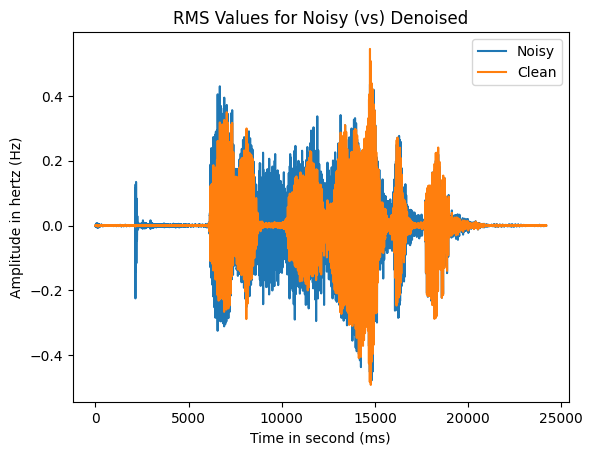

{'clean_signal': 0.072, 'noise_signal': 0.079}

In [23]:
rms = signal_analysis.calculate_rms()
rms

In [24]:
harmonic_distortion = signal_analysis.total_harmonic_distortion()
harmonic_distortion

76.642

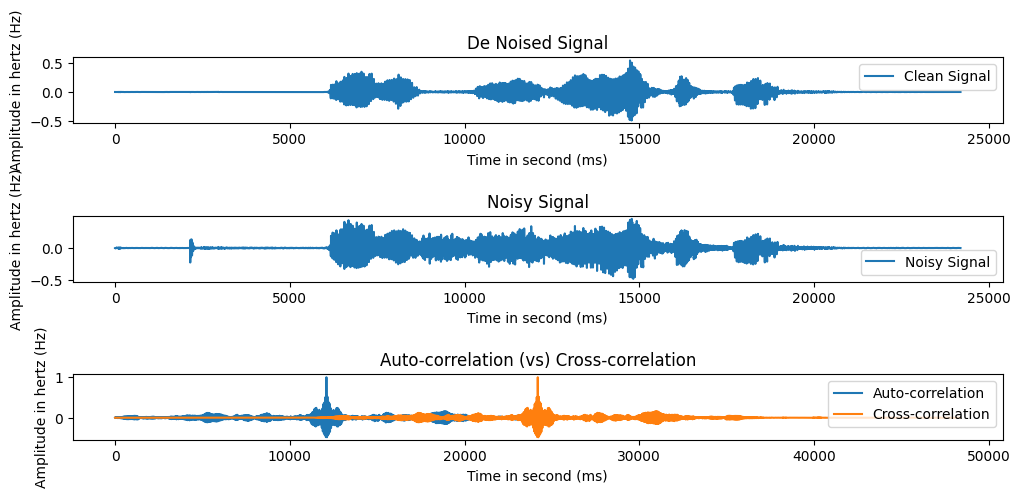

{'auto_corr': 49.332, 'cross_corr': 53.385}

In [25]:
correlation = signal_analysis.correlation()
correlation